In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Loading the datasets
movies_df = pd.read_csv('C:/Users/office/Desktop/python/ML/project/recommendation system/data/movies.csv')
ratings_df = pd.read_csv('C:/Users/office/Desktop/python/ML/project/recommendation system/data/ratings.csv')

In [19]:
# Data Overview
print("Movies Dataset:")
movies_df.head()
# movies_df.info()


Movies Dataset:


,movie_id,movie_title,genre
0,1,The Shawshank Redemption,Drama
1,2,The Godfather,Action
2,3,The Dark Knight,Adventure
3,4,Pulp Fiction,Sci-Fi
4,5,The Lord of the Rings,Sci-Fi


In [24]:
# Data Overview
print("Ratings Dataset:")
ratings_df.head()
# ratings_df.info()

Ratings Dataset:


,user_id,movie_id,rating
0,1,1,2.0
1,1,2,3.2
2,1,3,2.1
3,1,4,3.3
4,1,5,4.6


In [25]:
# Checking for missing values
print("Missing values in Movies Dataset:")
movies_df.isnull().sum()

Missing values in Movies Dataset:


movie_id       0
movie_title    0
genre          0
dtype: int64

In [26]:
print("Missing values in Ratings Dataset:")
ratings_df.isnull().sum()


Missing values in Ratings Dataset:


user_id     0
movie_id    0
rating      0
dtype: int64

In [27]:
# Descriptive statistics for Ratings Dataset
print("Descriptive statistics for Ratings Dataset:")
ratings_df['rating'].describe()

Descriptive statistics for Ratings Dataset:


count    5000.000000
mean        3.004380
std         1.144937
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

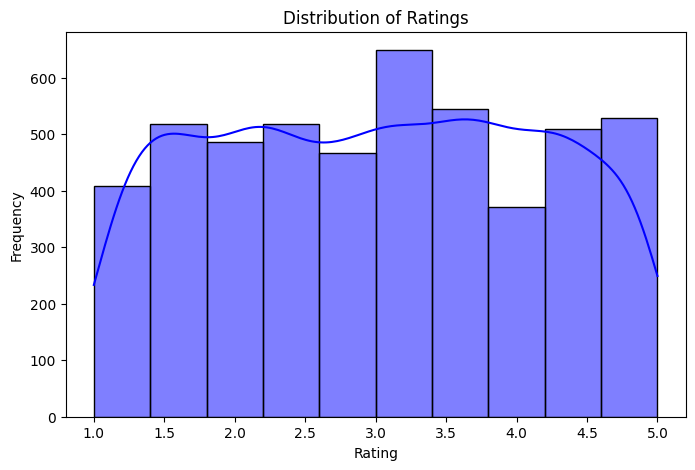

In [29]:
# Distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(ratings_df['rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


C:\Users\office\AppData\Local\Temp\ipykernel_21148\776922574.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


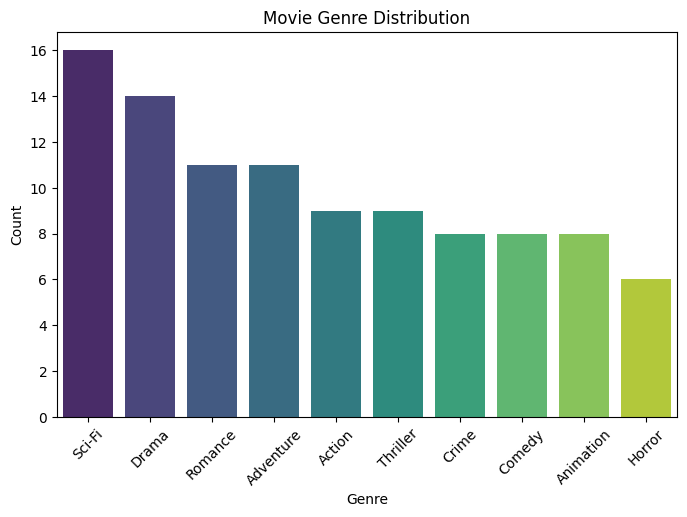

In [30]:
# Genre Distribution
genre_counts = movies_df['genre'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Movie Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\office\AppData\Local\Temp\ipykernel_21148\617871632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies.index, y=top_movies.values, palette='coolwarm')


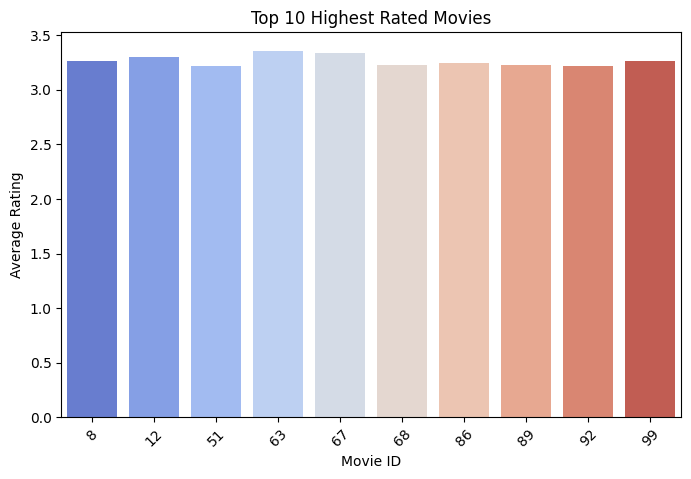

In [31]:

# Movie Ratings Distribution
movie_ratings = ratings_df.groupby('movie_id')['rating'].mean()
top_movies = movie_ratings.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_movies.index, y=top_movies.values, palette='coolwarm')
plt.title('Top 10 Highest Rated Movies')
plt.xlabel('Movie ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

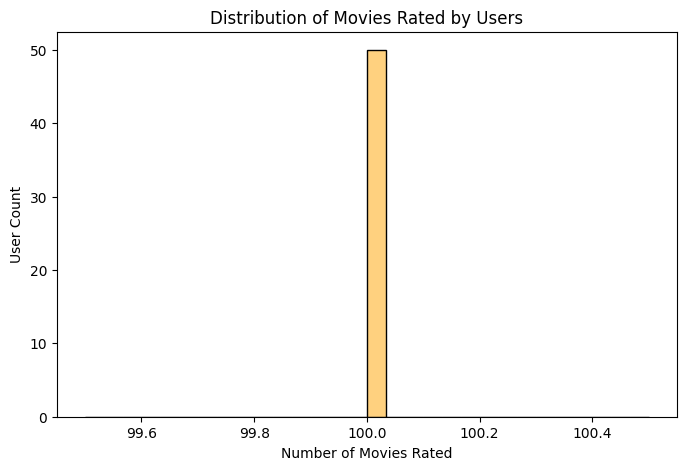

In [32]:

# User Rating Behavior
user_ratings_count = ratings_df.groupby('user_id').size()
plt.figure(figsize=(8, 5))
sns.histplot(user_ratings_count, bins=30, kde=True, color='orange')
plt.title('Distribution of Movies Rated by Users')
plt.xlabel('Number of Movies Rated')
plt.ylabel('User Count')
plt.show()


C:\Users\office\AppData\Local\Temp\ipykernel_21148\373682064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_movies['movie_title'], y=top_movies.values, palette='coolwarm')


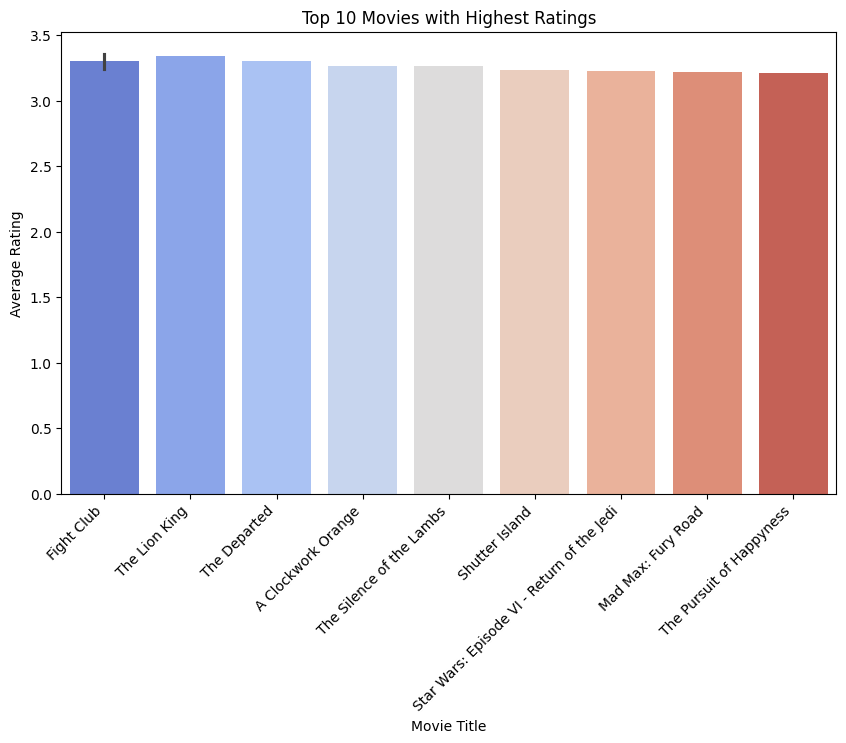

In [33]:
# Top Rated Movies - Exploring Movie Titles
top_rated_movies = movies_df[movies_df['movie_id'].isin(top_movies.index)]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_movies['movie_title'], y=top_movies.values, palette='coolwarm')
plt.title('Top 10 Movies with Highest Ratings')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\office\AppData\Local\Temp\ipykernel_21148\1567574831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette='Blues')


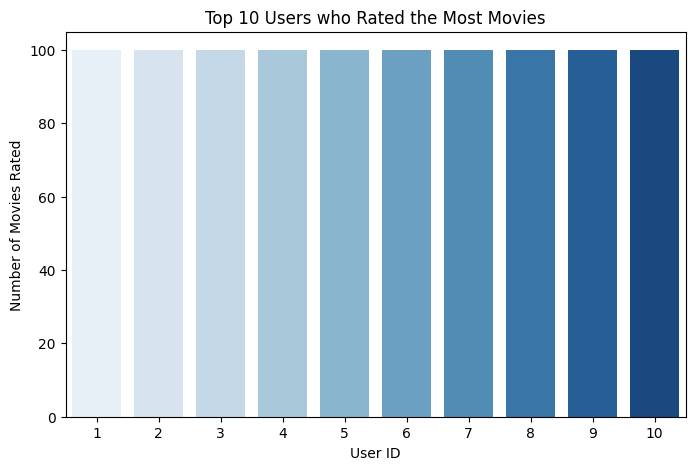

In [34]:
# Top Users (Users who rated the most movies)
top_users = user_ratings_count.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_users.index, y=top_users.values, palette='Blues')
plt.title('Top 10 Users who Rated the Most Movies')
plt.xlabel('User ID')
plt.ylabel('Number of Movies Rated')
plt.show()
